# Grid Search

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('dataset.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Making the Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
print(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[1 1 0 ... 1 1 1]
[[1092  103]
 [ 224 1081]]


0.8692

In [ ]:
# Convert y_pred to a DataFrame
df = pd.DataFrame({'y_pred': y_pred})

# Save the DataFrame to a CSV file
df.to_csv('predictions.csv', index=False)

In [ ]:

# Create a DataFrame with the confusion matrix values
df_cm = pd.DataFrame(cm)

# Export the DataFrame to a CSV file
df_cm.to_csv('confusion_matrix.csv', index=False)

In [ ]:
from flask import Flask, send_file
import pandas as pd
from sklearn.metrics import confusion_matrix

app = Flask(__name__)

@app.route('/download_confusion_matrix')
def download_confusion_matrix():
    # Assuming you have already computed the confusion matrix using y_test and y_pred
    cm = confusion_matrix(y_test, y_pred)

    # Create a DataFrame from the confusion matrix
    df_cm = pd.DataFrame(cm)

    # Save the DataFrame to a CSV file
    file_path = 'confusion_matrix.csv'
    df_cm.to_csv(file_path, index=False)

    # Serve the file for download
    return send_file(file_path, as_attachment=True)

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
from flask import Flask, send_file
import pandas as pd

app = Flask(__name__)

@app.route('/download_predictions')
def download_predictions():
    # Assuming you have already created the DataFrame 'df' with the predicted values
    df = pd.DataFrame({'y_pred': y_pred})

    # Save DataFrame to CSV file
    file_path = 'predictions.csv'
    df.to_csv(file_path, index=False)

    # Serve the file for download
    return send_file(file_path, as_attachment=True)

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 86.51 %
Standard Deviation: 0.93 %


## Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

KeyboardInterrupt: ignored

## Visualising the Training set results

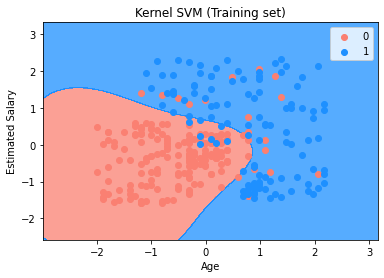

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

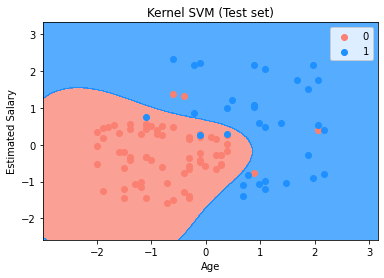

In [ ]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('salmon', 'dodgerblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('salmon', 'dodgerblue'))(i), label = j)
plt.title('Kernel SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
dataset2 = pd.read_csv('dataset2.csv')
X = dataset2.iloc[:, :-1].values
y = dataset2.iloc[:, -1].values

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
y_pred = regressor.predict(X_test)
print(y_pred)

ValueError: ignored

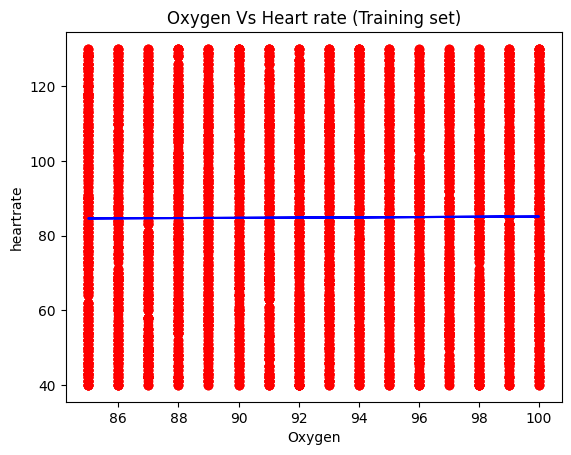

In [ ]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Oxygen Vs Heart rate (Training set)')
plt.xlabel('Oxygen')
plt.ylabel('heartrate')
plt.show()

## Visualising the Test set results

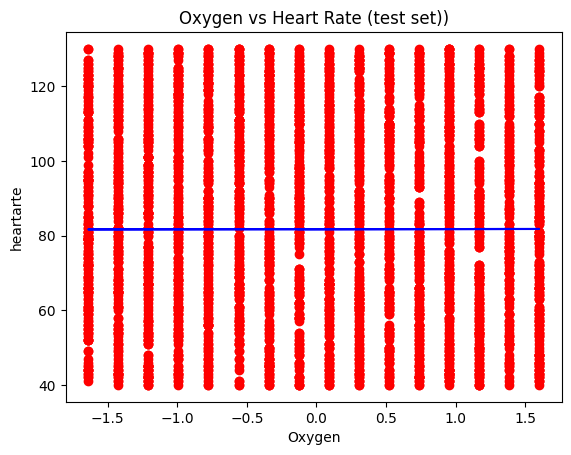

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Oxygen vs Heart Rate (test set))')
plt.xlabel('Oxygen')
plt.ylabel('heartarte')
plt.show()